## Case Study 1(Cervical Cancer Risk Classification)    
    
   
    Age
    Number of sexual partners
    First sexual intercourse
    Num of pregnancies
    Smokes
    Smokes (years)
    Smokes (packs/year)
    Hormonal Contraceptives
    Hormonal Contraceptives (years)
    IUD
    IUD (years)
    STDs
    STDs (number)
    STDs:condylomatosis
    STDs:cervical condylomatosis
    STDs:vaginal condylomatosis
    STDs:vulvo-perineal condylomatosis
    STDs:syphilis
    STDs:pelvic inflammatory disease
    STDs:genital herpes
    STDs:molluscum contagiosum
    STDs:AIDS
    STDs:HIV
    STDs:Hepatitis B
    STDs:HPV
    STDs: Number of diagnosis
    STDs: Time since first diagnosis
    STDs: Time since last diagnosis
    Dx:Cancer
    Dx:CIN
    Dx:HPV
    Dx
    Hinselmann
    Schiller
    Citology
    Biopsy

### 1.1 import some necessary librairies

In [2]:
import pandas as pd 
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt


### 1.2 import and put the train and test datasets in  pandas dataframe

In [3]:
cancer=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\1.+cervicalcancer-original+dataset.csv')
cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


### 1.3 check the data.describe()

In [3]:
cancer.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.4 Replacing ;?' with null values in each column?


In [6]:
cancer.replace({'?':np.nan},inplace=True)


### 1.5 Check count of 0 means not cancer affected and 1 means cancer affected cell


In [10]:
cancer['Dx:Cancer'].value_counts()


0    840
1     18
Name: Dx:Cancer, dtype: int64

observation:
   


In [ ]:
We can observe that most people are not cancer affected.A low percentage of people(around 2.1%) are only affected by Cancer

### 1.6 Check Correlation Plot. And your observations?

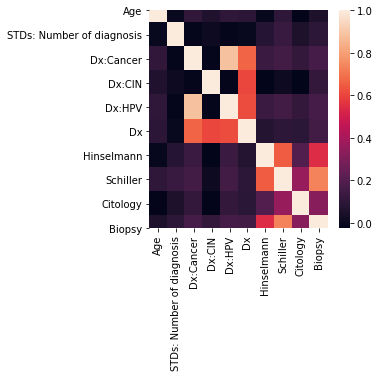

In [14]:
# correlation plot
plt.subplots(figsize=(4,4))
sns.heatmap(cancer.corr())
plt.show()

#### observation:
    

In [ ]:
We can observe that Cancer is not correlated with most factors.
It is only correlated with Dx & Dx:HPV .
Also we observe that Hinselmann,Schiller,Citology & Biopsy are not affecting cancer.

### 1.6a) list the heatmap of top correlation


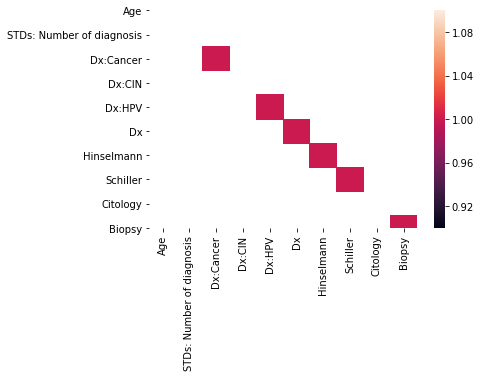

In [33]:
# list the heatmap of top correlation

corr=cancer.corr()
top_corr=corr[(abs(corr)>0.5)&(abs(corr)<1)]
sns.heatmap(top_corr.corr())
plt.show()



In [34]:
# number of variables for heatmap

[i for i in top_corr]

['Age',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

#### observation:
    

In [ ]:
We can see that the above variables present are having highest correlation in the dataset.\
Hence they can be used more for our machine learning model.

### 1.7 Imputing the missing values from the given dataset?

In [12]:
# we will impute the categorical variables with 0 or 1 and continuous variables with median value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()




In [13]:
cancer.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [23]:
# Imputing the missing values from First sexual intercourse
cancer['First sexual intercourse']=cancer['First sexual intercourse'].replace({'?':np.nan})


In [26]:
cancer['First sexual intercourse']=cancer['First sexual intercourse'].fillna(cancer['First sexual intercourse'].median())


In [35]:
# Imputing the missing values from Num of pregnancies
cancer['Num of pregnancies']=cancer['Num of pregnancies'].replace({'?':np.nan})


In [37]:
cancer['Num of pregnancies']=cancer['Num of pregnancies'].fillna(cancer['Num of pregnancies'].median())


In [41]:
# Imputing the missing values from Smokes
cancer['Smokes']=cancer['Smokes'].replace({'?':np.nan})


In [45]:
cancer['Smokes']=cancer['Smokes'].fillna(cancer['Smokes'].median())

In [50]:
# Imputing the missing values from Smokes (years)
cancer['Smokes (years)']=cancer['Smokes (years)'].replace({'?':np.nan})


In [51]:
cancer['Smokes (years)']=cancer['Smokes (years)'].fillna(cancer['Smokes (years)'].median())

In [52]:
# Imputing the missing values from Smokes (packs/year)

cancer['Smokes (packs/year)']=cancer['Smokes (packs/year)'].replace({'?':np.nan})

In [53]:
cancer['Smokes (packs/year)']=cancer['Smokes (packs/year)'].fillna(cancer['Smokes (packs/year)'].median())

In [55]:
# Imputing the missing values from Hormonal Contraceptives
cancer['Hormonal Contraceptives']=cancer['Hormonal Contraceptives'].replace({'?':np.nan})


In [56]:
cancer['Hormonal Contraceptives']=cancer['Hormonal Contraceptives'].fillna(cancer['Hormonal Contraceptives'].median())

In [57]:
# Imputing the missing values from Hormonal Contraceptives (years)
cancer['Hormonal Contraceptives (years)']=cancer['Hormonal Contraceptives (years)'].replace({'?':np.nan})


In [58]:
cancer['Hormonal Contraceptives (years)']=cancer['Hormonal Contraceptives (years)'].fillna(cancer['Hormonal Contraceptives (years)'].median())

In [62]:
# Imputing the missing values from IUD
cancer['IUD']=cancer['IUD'].replace({'?':np.nan})
cancer['IUD']=cancer['IUD'].fillna(cancer['IUD'].median())


In [65]:
# Imputing the missing values from IUD (years)
# Imputing the missing values from IUD
cancer['IUD (years)']=cancer['IUD (years)'].replace({'?':np.nan})
cancer['IUD (years)']=cancer['IUD (years)'].fillna(cancer['IUD (years)'].median())



In [67]:
# Imputing the missing values from STDs
cancer['STDs']=cancer['STDs'].replace({'?':np.nan})
cancer['STDs']=cancer['STDs'].fillna(cancer['STDs'].median())



In [70]:
# Imputing the missing values from STDs (number)
cancer['STDs (number)']=cancer['STDs (number)'].replace({'?':np.nan})
cancer['STDs (number)']=cancer['STDs (number)'].fillna(cancer['STDs (number)'].median())



In [73]:
# Imputing the missing values from STDs:condylomatosis
cancer['STDs:condylomatosis']=cancer['STDs:condylomatosis'].replace({'?':np.nan})
cancer['STDs:condylomatosis']=cancer['STDs:condylomatosis'].fillna(cancer['STDs:condylomatosis'].median())




In [74]:
# Imputing the missing values from STDs:cervical condylomatosis
cancer['STDs:cervical condylomatosis']=cancer['STDs:cervical condylomatosis'].replace({'?':np.nan})
cancer['STDs:cervical condylomatosis']=cancer['STDs:cervical condylomatosis'].fillna(cancer['STDs:cervical condylomatosis'].median())


In [76]:
# Imputing the missing values from STDs:vaginal condylomatosis

cancer['STDs:vaginal condylomatosis']=cancer['STDs:vaginal condylomatosis'].replace({'?':np.nan})
cancer['STDs:vaginal condylomatosis']=cancer['STDs:vaginal condylomatosis'].fillna(cancer['STDs:vaginal condylomatosis'].median())



In [78]:
# Imputing the missing values from STDs:vulvo-perineal condylomatosis


cancer['STDs:vulvo-perineal condylomatosis']=cancer['STDs:vulvo-perineal condylomatosis'].replace({'?':np.nan})
cancer['STDs:vulvo-perineal condylomatosis']=cancer['STDs:vulvo-perineal condylomatosis'].fillna(cancer['STDs:vulvo-perineal condylomatosis'].median())




In [81]:
# Imputing the missing values from STDs:syphilis



cancer['STDs:syphilis']=cancer['STDs:syphilis'].replace({'?':np.nan})
cancer['STDs:syphilis']=cancer['STDs:syphilis'].fillna(cancer['STDs:syphilis'].median())





In [87]:
# Imputing the missing values from STDs:pelvic inflammatory diseases
cancer['STDs:pelvic inflammatory disease']=cancer['STDs:pelvic inflammatory disease'].replace({'?':np.nan})
cancer['STDs:pelvic inflammatory disease']=cancer['STDs:pelvic inflammatory disease'].fillna(cancer['STDs:pelvic inflammatory disease'].median())


In [88]:
# Imputing the missing values from STDs:genital herpes


cancer['STDs:genital herpes']=cancer['STDs:genital herpes'].replace({'?':np.nan})
cancer['STDs:genital herpes']=cancer['STDs:genital herpes'].fillna(cancer['STDs:genital herpes'].median())


In [89]:
# Imputing the missing values from STDs:molluscum contagiosum

cancer['STDs:molluscum contagiosum']=cancer['STDs:molluscum contagiosum'].replace({'?':np.nan})
cancer['STDs:molluscum contagiosum']=cancer['STDs:molluscum contagiosum'].fillna(cancer['STDs:molluscum contagiosum'].median())


In [90]:
# Imputing the missing values from STDs:AIDS


cancer['STDs:AIDS']=cancer['STDs:AIDS'].replace({'?':np.nan})
cancer['STDs:AIDS']=cancer['STDs:AIDS'].fillna(cancer['STDs:AIDS'].median())


In [91]:
# Imputing the missing values from STDs:HIV

cancer['STDs:HIV']=cancer['STDs:HIV'].replace({'?':np.nan})
cancer['STDs:HIV']=cancer['STDs:HIV'].fillna(cancer['STDs:HIV'].median())


In [92]:
# Imputing the missing values from STDs:Hepatitis B

cancer['STDs:Hepatitis B']=cancer['STDs:Hepatitis B'].replace({'?':np.nan})
cancer['STDs:Hepatitis B']=cancer['STDs:Hepatitis B'].fillna(cancer['STDs:Hepatitis B'].median())


In [93]:
# Imputing the missing values from STDs:HPV

cancer['STDs:HPV']=cancer['STDs:HPV'].replace({'?':np.nan})
cancer['STDs:HPV']=cancer['STDs:HPV'].fillna(cancer['STDs:HPV'].median())



In [94]:
# Imputing the missing values from STDs: Time since first diagnosis

cancer['STDs: Time since first diagnosis']=cancer['STDs: Time since first diagnosis'].replace({'?':np.nan})
cancer['STDs: Time since first diagnosis']=cancer['STDs: Time since first diagnosis'].fillna(cancer['STDs: Time since first diagnosis'].median())



In [95]:
# Imputing the missing values from STDs: Time since last diagnosis

cancer['STDs: Time since last diagnosis']=cancer['STDs: Time since last diagnosis'].replace({'?':np.nan})
cancer['STDs: Time since last diagnosis']=cancer['STDs: Time since last diagnosis'].fillna(cancer['STDs: Time since last diagnosis'].median())



###  1.8 Imputing null values for categorical variables for get_dummies

In [107]:
a=pd.get_dummies(data=cancer)
a

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,...,STDs: Time since last diagnosis_2.0,STDs: Time since last diagnosis_21.0,STDs: Time since last diagnosis_22.0,STDs: Time since last diagnosis_3.0,STDs: Time since last diagnosis_4.0,STDs: Time since last diagnosis_5.0,STDs: Time since last diagnosis_6.0,STDs: Time since last diagnosis_7.0,STDs: Time since last diagnosis_8.0,STDs: Time since last diagnosis_9.0
0,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
855,25,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
856,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Here we compute Null values from the get_dummies . 

### 1.10 Data Visualization for checking any categorical variables or not using count plot?

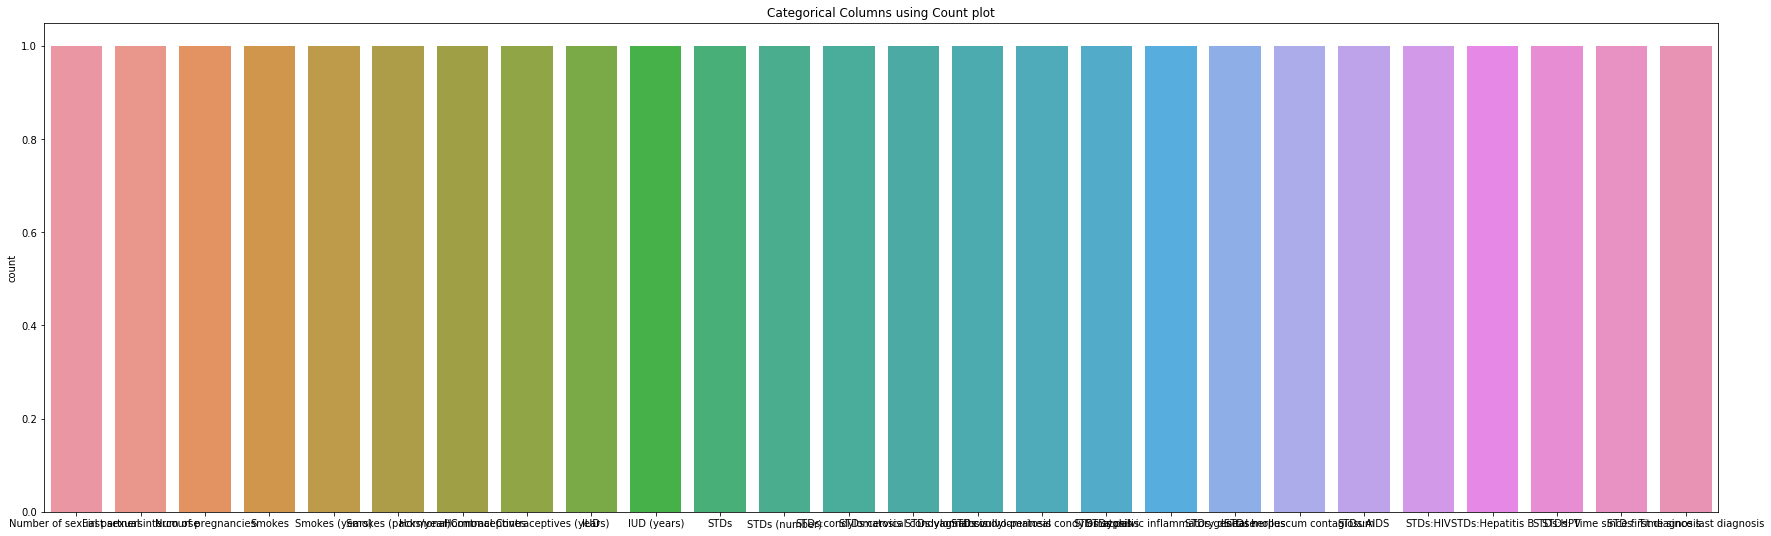

In [104]:
cat_features=[i for i in cancer.columns if cancer.dtypes[i]=='object']
plt.subplots(figsize=(30,9))
sns.countplot(cat_features)
plt.title('Categorical Columns using Count plot')
plt.show()

### 1.11 splitting the dataset into dependent and independent variables?

In [ ]:
x=cancer.drop(['Dx:Cancer'],axis=1)
y=cancer['Dx:Cancer']

### 1.12 splitting the dataset into  training and test set?

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=0)

# The End